In [14]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [15]:
data=pd.read_csv('breast-cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.drop('diagnosis',axis=1),data['diagnosis'],test_size=0.2)

In [18]:
X_train.shape

(455, 31)

In [38]:
ft=X_train.columns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
transform=ColumnTransformer([
    ('scale',StandardScaler(),ft)
    ],remainder='passthrough')

In [39]:
transform.fit(X_train)
X_train=transform.transform(X_train)
X_test=transform.transform(X_test)

### In deep learning there is no need for feature Engineering

In [40]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(31,input_shape=(31,),activation='relu'),

    tf.keras.layers.Dense(1,activation='sigmoid')
])


In [41]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 31)                992       
                                                                 
 dense_15 (Dense)            (None, 1)                 32        
                                                                 
Total params: 1024 (4.00 KB)
Trainable params: 1024 (4.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [43]:
history=model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
12/12 [==============================] - 1s 21ms/step - loss: 0.6129 - accuracy: 0.6374 - val_loss: 0.5011 - val_accuracy: 0.8242
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.4468 - accuracy: 0.8407 - val_loss: 0.3867 - val_accuracy: 0.9341
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.3463 - accuracy: 0.9396 - val_loss: 0.3145 - val_accuracy: 0.9560
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.2824 - accuracy: 0.9478 - val_loss: 0.2640 - val_accuracy: 0.9670
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.2389 - accuracy: 0.9505 - val_loss: 0.2281 - val_accuracy: 0.9670
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.2073 - accuracy: 0.9533 - val_loss: 0.2029 - val_accuracy: 0.9670
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1838 - accuracy: 0.9533 - val_loss: 0.1845 - val_accuracy: 0.9670
Epoch 8/100


<Axes: >

<Figure size 500x500 with 0 Axes>

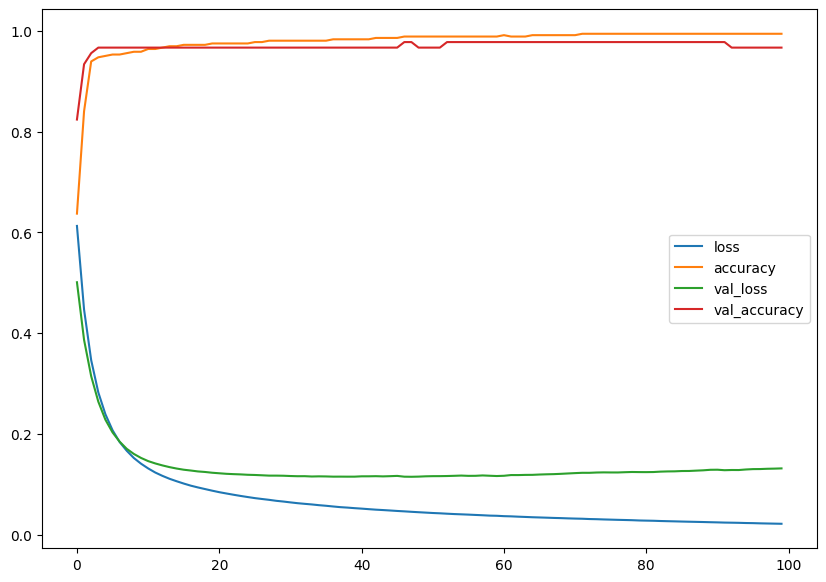

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
pd.DataFrame(history.history).plot(figsize=(10,7))

## Above model is clearly a case of overfitting

## Applying L1L2 regularization and dropout to increase generalization and reduce overfitting

In [61]:
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(31,input_shape=(31,),activation='relu',kernel_regularizer=tf.keras.regularizers.L1L2(l1=0.01, l2=0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [62]:
model_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 31)                992       
                                                                 
 dropout_5 (Dropout)         (None, 31)                0         
                                                                 
 dense_29 (Dense)            (None, 3)                 96        
                                                                 
 dense_30 (Dense)            (None, 1)                 4         
                                                                 
Total params: 1092 (4.27 KB)
Trainable params: 1092 (4.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
model_2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history_2=model_2.fit(X_train,y_train,epochs=80,validation_split=0.2)

Epoch 1/80
12/12 [==============================] - 1s 21ms/step - loss: 2.2542 - accuracy: 0.7720 - val_loss: 1.9764 - val_accuracy: 0.9341
Epoch 2/80
12/12 [==============================] - 0s 6ms/step - loss: 1.9943 - accuracy: 0.8874 - val_loss: 1.8441 - val_accuracy: 0.9451
Epoch 3/80
12/12 [==============================] - 0s 5ms/step - loss: 1.8568 - accuracy: 0.9066 - val_loss: 1.7412 - val_accuracy: 0.9560
Epoch 4/80
12/12 [==============================] - 0s 5ms/step - loss: 1.7049 - accuracy: 0.9286 - val_loss: 1.6452 - val_accuracy: 0.9560
Epoch 5/80
12/12 [==============================] - 0s 6ms/step - loss: 1.6077 - accuracy: 0.9286 - val_loss: 1.5522 - val_accuracy: 0.9560
Epoch 6/80
12/12 [==============================] - 0s 7ms/step - loss: 1.5014 - accuracy: 0.9451 - val_loss: 1.4630 - val_accuracy: 0.9560
Epoch 7/80
12/12 [==============================] - 0s 6ms/step - loss: 1.4174 - accuracy: 0.9478 - val_loss: 1.3785 - val_accuracy: 0.9560
Epoch 8/80
12/12 [=

<Axes: >

<Figure size 500x500 with 0 Axes>

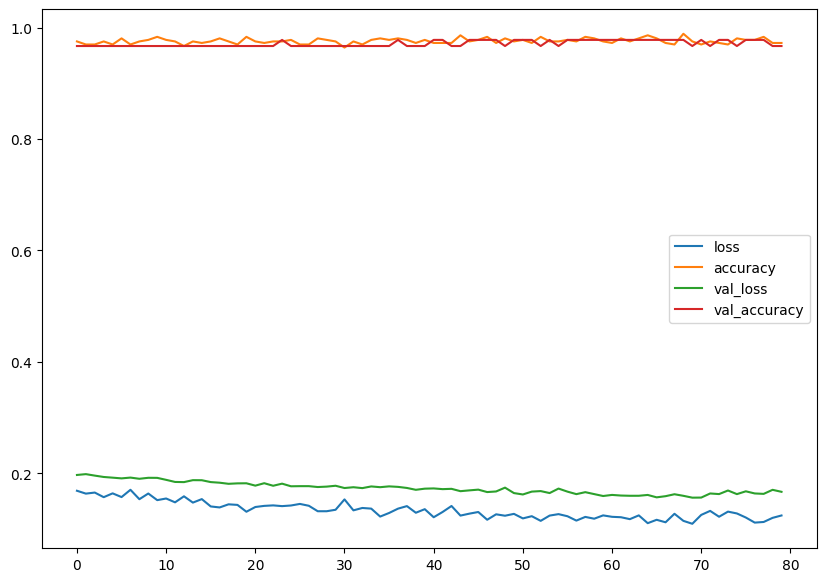

In [60]:
plt.figure(figsize=(5,5))
pd.DataFrame(history_2.history).plot(figsize=(10,7))

## Applying Regularization and Increaing dropout range to get more generalization

In [65]:
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(8,input_shape=(31,),activation='relu',kernel_regularizer=tf.keras.regularizers.L1L2(l1=0.01, l2=0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history_3=model_3.fit(X_train,y_train,epochs=80,validation_split=0.2)


Epoch 1/80
12/12 [==============================] - 3s 39ms/step - loss: 1.7460 - accuracy: 0.5577 - val_loss: 1.2320 - val_accuracy: 0.6374
Epoch 2/80
12/12 [==============================] - 0s 6ms/step - loss: 1.6397 - accuracy: 0.5632 - val_loss: 1.1218 - val_accuracy: 0.7802
Epoch 3/80
12/12 [==============================] - 0s 5ms/step - loss: 1.4243 - accuracy: 0.6016 - val_loss: 1.0435 - val_accuracy: 0.8132
Epoch 4/80
12/12 [==============================] - 0s 6ms/step - loss: 1.3426 - accuracy: 0.6374 - val_loss: 0.9844 - val_accuracy: 0.8352
Epoch 5/80
12/12 [==============================] - 0s 6ms/step - loss: 1.2969 - accuracy: 0.6511 - val_loss: 0.9337 - val_accuracy: 0.8571
Epoch 6/80
12/12 [==============================] - 0s 5ms/step - loss: 1.1603 - accuracy: 0.6731 - val_loss: 0.8928 - val_accuracy: 0.8901
Epoch 7/80
12/12 [==============================] - 0s 7ms/step - loss: 1.1594 - accuracy: 0.6813 - val_loss: 0.8541 - val_accuracy: 0.9011
Epoch 8/80
12/12 [=

<Axes: >

<Figure size 500x500 with 0 Axes>

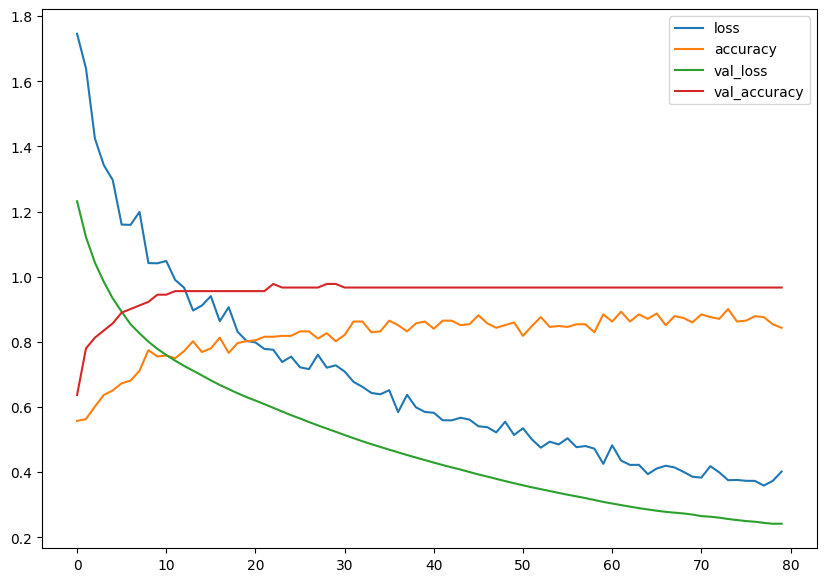

In [66]:
plt.figure(figsize=(5,5))
pd.DataFrame(history_3.history).plot(figsize=(10,7))

In [67]:
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score


##### Model_1

In [69]:
pred1=model.predict(X_test)
pred1=pred1.round()
print("Accuracy Score = ",accuracy_score(y_test,pred1))
print("Recall Score = ",recall_score(y_test,pred1))
print("Precision Score = ",precision_score(y_test,pred1,average=None))
print("F1 Score = ",f1_score(y_test,pred1))

4/4 [==============================] - 0s 3ms/step
Accuracy Score =  0.32456140350877194
Recall Score =  0.8372093023255814
Precision Score =  [0.125      0.33962264]
F1 Score =  0.483221476510067


#### Model 2

In [71]:
pred2=model_2.predict(X_test)
pred2=pred2.round()
print("Accuracy Score = ",accuracy_score(y_test,pred2))
print("Recall Score = ",recall_score(y_test,pred2))
print("Precision Score = ",precision_score(y_test,pred2,average=None))
print("F1 Score = ",f1_score(y_test,pred2))

4/4 [==============================] - 0s 4ms/step
Accuracy Score =  0.9912280701754386
Recall Score =  1.0
Precision Score =  [1.         0.97727273]
F1 Score =  0.9885057471264368


#### Model 3

In [72]:
pred3=model_3.predict(X_test)
pred3=pred2.round()
print("Accuracy Score = ",accuracy_score(y_test,pred3))
print("Recall Score = ",recall_score(y_test,pred3))
print("Precision Score = ",precision_score(y_test,pred3,average=None))
print("F1 Score = ",f1_score(y_test,pred3))

4/4 [==============================] - 0s 6ms/step
Accuracy Score =  0.9912280701754386
Recall Score =  1.0
Precision Score =  [1.         0.97727273]
F1 Score =  0.9885057471264368
